In [2]:
from data import load_feature_and_outcome, load_reference_genes
from utils import *

from matplotlib import pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

In [4]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import LinearSVC

In [5]:
gene_names, features, labels, feature_map_tables = load_feature_and_outcome(shuffle=True)

# Select feature with LSVM
It seems not working.... One stump is even better...

In [8]:
results = []
for i in range(10):
    _dataset = data_split(features, labels)
    _baseline = np.array((_dataset[0][1].mean(), _dataset[1][1].mean()))
    results.append(np.array(test_lsvm(_dataset)) - _baseline)
    print ('baseline    :  %.4f %.4f' %  tuple(_baseline))
    print ('perform gain:  %.4f %.4f' % tuple(results[-1]))

c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8738 0.8289
perform gain:  0.1196 -0.0395


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8671 0.8553
perform gain:  0.1229 0.0263


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8738 0.8289
perform gain:  0.1163 0.0132


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8671 0.8553
perform gain:  0.0997 -0.1579


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8571 0.8947
perform gain:  0.1329 -0.0263


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8671 0.8553
perform gain:  0.1130 -0.1053


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8638 0.8684
perform gain:  0.1130 -0.1053


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8738 0.8289
perform gain:  0.1030 0.0263


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


baseline    : 0.8738 0.8289
perform gain:  0.1063 0.0000
baseline    : 0.8671 0.8553
perform gain:  0.1196 0.0132


c:\users\flyin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
np.array(results).mean(axis=0)

array([ 0.11461794, -0.03552632])

# NOOOOOOOOOOOOooo...
Search a XGBoost model to select feature. <br>
But the BEST XGB model only has a 0.5% accuracy gain (compared to one-stump classifier). <br>
So it failed too...

In [37]:
params_list = {
    'n_estimators':[100],
    'max_depth':[2,3,4,8],
    'min_child_weight':[1,2,4,8,16,32],
    'n_jobs':[8]
}

whole_list, score_list, baseline = grid_search(features, labels, test_xgb, params_list, replicates=100, fraction=0.7)

In [83]:
np_score_list = [item for item in score_list if item != []]
np_score_list = np.array(np_score_list)
np_score_list = np_score_list.reshape(-1,100,2)

np_baseline = np.array(baseline)
averaged_score_list = np_score_list - np_baseline

final_score_gain = averaged_score_list.mean(axis=1)
best_params = whole_list[np.argmax(final_score_gain[:,1])]

In [105]:
final_score_gain[:,1].max()

0.005000000000000004

best model: depth=8 (may be greater), min_child_weight=2

# ...single variable correlation

In [64]:
(features_8, labels_8), (features_2, labels_2) = data_split(features, labels, fraction=0.8)

In [84]:
# replicate 1
rank_summary1 = select_feature_by_pearson(features_8, labels_8, replicates=500)
gene_names[np.argsort(rank_summary1)[:30]]

 500/500  

array(['CLK1', 'MED12', 'HAUS4', 'UBXN1', 'NRN1', 'EIF3E', 'DDX59',
       'ZNF32', 'ARID1A', 'CSKMT', 'MARCH8', 'SAFB2', 'HEXDC', 'RRNAD1',
       'ZSWIM8', 'ZNF518A', 'RPL23', 'ANAPC16', 'THAP9', 'CWF19L2',
       'HARS2', 'LOC401261', 'BTAF1', 'C14orf93', 'SHC2', 'CUL9',
       'CLNS1A', 'KDM3B', 'HPS4', 'HNRNPA1'], dtype='<U22')

In [85]:
# replicate 2
rank_summary2 = select_feature_by_pearson(features_8, labels_8, replicates=500)
gene_names[np.argsort(rank_summary2)[:30]]

 500/500  

array(['CLK1', 'MED12', 'UBXN1', 'HAUS4', 'NRN1', 'ZNF32', 'CSKMT',
       'ARID1A', 'EIF3E', 'MARCH8', 'SAFB2', 'DDX59', 'RRNAD1', 'ZNF518A',
       'HEXDC', 'RPL23', 'ZSWIM8', 'CWF19L2', 'ANAPC16', 'HARS2',
       'HNRNPA1', 'THAP9', 'C14orf93', 'BTAF1', 'SHC2', 'SMARCC2',
       'CTBP2', 'SNORD104', 'RPS14', 'RPL5'], dtype='<U22')

In [86]:
# replicate 3
rank_summary3 = select_feature_by_pearson(features_8, labels_8, replicates=500)
gene_names[np.argsort(rank_summary3)[:30]]

 500/500  

array(['CLK1', 'MED12', 'UBXN1', 'HAUS4', 'EIF3E', 'NRN1', 'DDX59',
       'SAFB2', 'ZNF32', 'ARID1A', 'RRNAD1', 'MARCH8', 'CSKMT', 'HEXDC',
       'ZNF518A', 'CWF19L2', 'ZSWIM8', 'HARS2', 'THAP9', 'ANAPC16',
       'CUL9', 'RPL23', 'ANKZF1', 'LOC401261', 'SHC2', 'CLNS1A', 'HPS4',
       'BTAF1', 'SMARCC2', 'C14orf93'], dtype='<U22')

In [87]:
# final replicate
rank_summary = select_feature_by_pearson(features_8, labels_8, replicates=5000)
gene_names[np.argsort(rank_summary)[:30]]

 5000/5000  

array(['CLK1', 'MED12', 'UBXN1', 'HAUS4', 'NRN1', 'ZNF32', 'EIF3E',
       'DDX59', 'ARID1A', 'CSKMT', 'MARCH8', 'SAFB2', 'RRNAD1', 'HEXDC',
       'ZNF518A', 'ZSWIM8', 'THAP9', 'RPL23', 'CWF19L2', 'HARS2',
       'ANAPC16', 'C14orf93', 'BTAF1', 'SHC2', 'LOC401261', 'HNRNPA1',
       'SMARCC2', 'HPS4', 'KDM3B', 'CLNS1A'], dtype='<U22')

In [91]:
np.savetxt('gene_ranks.txt', gene_names[np.argsort(rank_summary)], fmt='%s')

In [92]:
np.save('rank_summary.npy', rank_summary)

# Esitmate the number of feature needed for classifier

In [ ]:
performance_num_curve = []
baseline_num_curve = []
for i in range(1,200,10):
    
    selected_features = features[:,np.argsort(rank_summary)[:i]]
    print (i)
    for j in range(40):
        dataset = data_split(selected_features, labels)
        performance = test_xgb(dataset, **{
            'n_estimators':200,
            'max_depth':5,
            'min_child_weight':2,
            'n_jobs':8
        })
        baseline = (dataset[0][1].mean(), dataset[1][1].mean())
        performance_num_curve.append(performance)
        baseline_num_curve.append(baseline)

p_gain = np.array(performance_num_curve) - np.array(baseline_num_curve)

In [226]:
p_gain = p_gain.reshape([-1,40,2])
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.arange(1,200,10).reshape([-1,1]), p_gain[:,:,1].mean(axis=1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

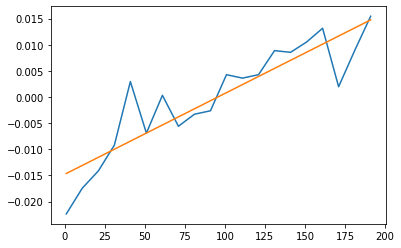

In [227]:
plt.plot(range(1,200,10), p_gain[:,:,1].mean(axis=1))
plt.plot(np.arange(1,200,10), lr.predict(np.arange(1,200,10).reshape([-1,1])))

In [ ]:
performance_num_curve = []
baseline_num_curve = []
for i in range(1,2000,100):
    
    selected_features = features[:,np.argsort(rank_summary)[:i]]
    print (i)
    for j in range(40):
        dataset = data_split(selected_features, labels)
        performance = test_xgb(dataset, **{
            'n_estimators':200,
            'max_depth':5,
            'min_child_weight':2,
            'n_jobs':8
        })
        baseline = (dataset[0][1].mean(), dataset[1][1].mean())
        performance_num_curve.append(performance)
        baseline_num_curve.append(baseline)
        

p_gain = np.array(performance_num_curve) - np.array(baseline_num_curve)
p_gain = p_gain.reshape([-1,40,2])
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.arange(1,2000,100).reshape([-1,1]), p_gain[:,:,1].mean(axis=1))

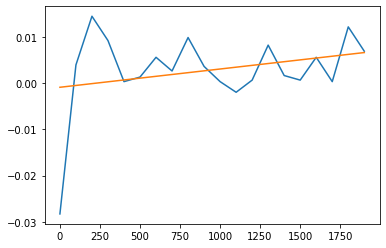

In [233]:
plt.plot(range(1,2000,100), p_gain[:,:,1].mean(axis=1))
plt.plot(np.arange(1,2000,100), lr.predict(np.arange(1,2000,100).reshape([-1,1])))

In [235]:
performance_num_curve = []
baseline_num_curve = []
for i in range(200,400,10):
    
    selected_features = features[:,np.argsort(rank_summary)[:i]]
    print (i)
    for j in range(40):
        dataset = data_split(selected_features, labels)
        performance = test_xgb(dataset, **{
            'n_estimators':200,
            'max_depth':5,
            'min_child_weight':2,
            'n_jobs':8
        })
        baseline = (dataset[0][1].mean(), dataset[1][1].mean())
        performance_num_curve.append(performance)
        baseline_num_curve.append(baseline)
        

p_gain = np.array(performance_num_curve) - np.array(baseline_num_curve)
p_gain = p_gain.reshape([-1,40,2])
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.arange(200,400,10).reshape([-1,1]), p_gain[:,:,1].mean(axis=1))

200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

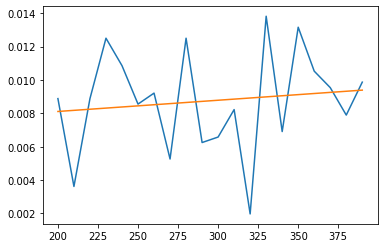

In [236]:
plt.plot(range(200,400,10), p_gain[:,:,1].mean(axis=1))
plt.plot(np.arange(200,400,10), lr.predict(np.arange(200,400,10).reshape([-1,1])))

it seems ~160 features should be ok

# fit feature and classifier params in epoches

In [239]:
selected_feature_final = features[:,np.argsort(rank_summary)[:160]]

In [355]:
selected_feature_names = gene_names[np.argsort(rank_summary)[:160]]

In [356]:
selected_feature_names

array(['CLK1', 'MED12', 'UBXN1', 'HAUS4', 'NRN1', 'ZNF32', 'EIF3E',
       'DDX59', 'ARID1A', 'CSKMT', 'MARCH8', 'SAFB2', 'RRNAD1', 'HEXDC',
       'ZNF518A', 'ZSWIM8', 'THAP9', 'RPL23', 'CWF19L2', 'HARS2',
       'ANAPC16', 'C14orf93', 'BTAF1', 'SHC2', 'LOC401261', 'HNRNPA1',
       'SMARCC2', 'HPS4', 'KDM3B', 'CLNS1A', 'CTBP2', 'CUL9', 'ANKZF1',
       'CEP44', 'BRD8', 'JADE1', 'RPL5', 'SNORD104', 'CPSF7', 'HFM1',
       'RACE', 'PARD3', 'EIF3H', 'ZBED8', 'SPEN', 'SEPHS1', 'RPL30',
       'RPS14', 'ZSWIM7', 'ASB3', 'CREBBP', 'SFPQ', 'SF1', 'NELFA',
       'ELK1', 'HNRNPH3', 'DHTKD1', 'EP300', 'UBR5', 'RGS9', 'PNN',
       'EBF4', 'MTHFD2', 'PTCD3', 'RASSF4', 'EDRF1', 'PPWD1', 'AP1S1',
       'DUSP3', 'ANKRA2', 'POGZ', 'NACA', 'NSMCE4A', 'BMS1', 'NACAP1',
       'UBE2NL', 'INPPL1', 'CRAMP1', 'CLK4', 'ACIN1', 'CEP131', 'NAT9',
       'GTF2IRD1', 'SNHG1', 'DVL2', 'KANSL1', 'MTA1', 'AATF', 'CIR1',
       'RPL4', 'TAF4', 'ZNF500', 'PCMTD1', 'DLG5', 'EED', 'CBR4', 'EEF1D',
       'SDR39U1'

find a params manually

In [566]:
dataset = data_split(selected_feature_final, labels)
baseline = (dataset[0][1].mean(), dataset[1][1].mean())
params = {
    'n_estimators':800,
    'max_depth':16,
    'min_child_weight':2,
    'n_jobs':8
}
performance = test_xgb(dataset, **params)

In [567]:
performance

(1.0, 0.8947368421052632)

In [568]:
baseline

(0.8604651162790697, 0.881578947368421)

this params seems to be ok, filter the features.

In [357]:
from xgboost.sklearn import XGBClassifier

In [365]:
train_dataset, valid_dataset = data_split(selected_feature_final, labels, fraction=0.8)

feature_importance = np.zeros(selected_feature_final.shape[1], dtype='float')
for i in range(40):
    print('\r%2d/%2d  ' % (i+1,40), end='')
    _train_dataset, _ = data_split(*train_dataset, fraction=0.8)
    clf = XGBClassifier(**params)
    clf.fit(*_train_dataset)
    feature_importance += clf.feature_importances_
    
feature_importance /= 40

40/40  

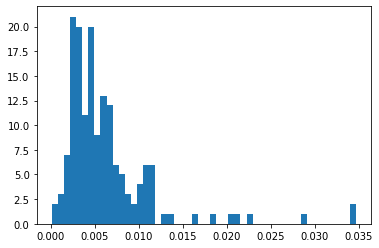

In [372]:
_=plt.hist(feature_importance, bins=50)

it seems 0.010 would be the 1st level, 0.005 be the second level.

In [376]:
# 1st level features
(feature_importance > 0.01).sum()

25

In [378]:
selected_feature_names[feature_importance > 0.01]

array(['HAUS4', 'NRN1', 'ZNF32', 'C14orf93', 'LOC401261', 'CUL9', 'RACE',
       'SPEN', 'RASSF4', 'AP1S1', 'DUSP3', 'AATF', 'RPL4', 'PCMTD1',
       'ABRAXAS1', 'PUM1', 'HIST1H2BB', 'SMURF2', 'WDR11', 'LBHD1',
       'SRD5A1', 'C2orf68', 'PURA', 'RAVER2', 'RANGRF'], dtype='<U22')

In [377]:
# 1st level features
(feature_importance > 0.005).sum()

74

In [379]:
selected_feature_names[feature_importance > 0.005]

array(['CLK1', 'HAUS4', 'NRN1', 'ZNF32', 'EIF3E', 'ARID1A', 'CSKMT',
       'ZNF518A', 'ZSWIM8', 'CWF19L2', 'C14orf93', 'LOC401261', 'SMARCC2',
       'KDM3B', 'CTBP2', 'CUL9', 'RACE', 'ZBED8', 'SPEN', 'SEPHS1',
       'RPL30', 'RPS14', 'ASB3', 'SF1', 'ELK1', 'DHTKD1', 'EP300',
       'MTHFD2', 'PTCD3', 'RASSF4', 'EDRF1', 'AP1S1', 'DUSP3', 'ANKRA2',
       'NACA', 'NSMCE4A', 'NACAP1', 'UBE2NL', 'INPPL1', 'CRAMP1',
       'GTF2IRD1', 'DVL2', 'MTA1', 'AATF', 'CIR1', 'RPL4', 'PCMTD1',
       'EEF1D', 'MOCS1', 'RAB2B', 'ENC1', 'ABRAXAS1', 'PUM1', 'PRDM11',
       'HIST1H2BB', 'GMPR2', 'RPA4', 'SCRN2', 'ZNF594', 'SMURF2', 'WDR11',
       'LBHD1', 'SRD5A1', 'RCOR1', 'C2orf68', 'TMEM129', 'TMEM175',
       'C2orf27A', 'PURA', 'RAVER2', 'APC2', 'GPS2', 'PRPF3', 'RANGRF'],
      dtype='<U22')

so test these stages

level 0 newly added

In [512]:
feature_0_stage = selected_feature_final[:,feature_importance > 0.015]
scores_0 = []
baselines_0 = []
for i in range(100):
    print('\r%2d/%2d  ' % (i+1,100), end='')
    dataset = data_split(feature_0_stage, labels, fraction=0.7)
    baseline = (dataset[0][1].mean(), dataset[1][1].mean())
    perform = test_xgb(dataset, **params)
    
    scores_0.append(perform)
    baselines_0.append(baseline)

100/100  

In [513]:
score_0 = np.asarray(scores_0).reshape(-1,2)
baseline_0 = np.array(baselines_0)

In [514]:
(score_0 - baseline_0).mean(axis=0)

array([0.13479087, 0.01131579])

In [382]:
feature_1st_stage = selected_feature_final[:,feature_importance > 0.01]
scores_1st = []
baselines_1st = []
for i in range(100):
    print('\r%2d/%2d  ' % (i+1,100), end='')
    dataset = data_split(feature_1st_stage, labels, fraction=0.7)
    baseline = (dataset[0][1].mean(), dataset[1][1].mean())
    perform = test_xgb(dataset, **params)
    
    scores_1st.append(perform)
    baselines_1st.append(baseline)

100/100  

In [388]:
score_1st = np.asarray(scores_1st).reshape(-1,2)
baseline_1st = np.array(baselines_1st)

In [389]:
(score_1st - baseline_1st).mean(axis=0)

array([0.1343346 , 0.01201754])

In [383]:
feature_2nd_stage = selected_feature_final[:,feature_importance > 0.005]
scores_2nd = []
baselines_2nd = []
for i in range(100):
    print('\r%2d/%2d  ' % (i+1,100), end='')
    dataset = data_split(feature_2nd_stage, labels, fraction=0.7)
    baseline = (dataset[0][1].mean(), dataset[1][1].mean())
    perform = test_xgb(dataset, **params)
    
    scores_2nd.append(perform)
    baselines_2nd.append(baseline)

100/100  

In [390]:
score_2nd = np.asarray(scores_2nd).reshape(-1,2)
baseline_2nd = np.array(baselines_2nd)

In [391]:
(score_2nd - baseline_2nd).mean(axis=0)

array([0.13486692, 0.00736842])

there's no doubt to select 1st level

let's check the final feature we selected:

In [393]:
selected_feature_names[feature_importance > 0.01]

array(['HAUS4', 'NRN1', 'ZNF32', 'C14orf93', 'LOC401261', 'CUL9', 'RACE',
       'SPEN', 'RASSF4', 'AP1S1', 'DUSP3', 'AATF', 'RPL4', 'PCMTD1',
       'ABRAXAS1', 'PUM1', 'HIST1H2BB', 'SMURF2', 'WDR11', 'LBHD1',
       'SRD5A1', 'C2orf68', 'PURA', 'RAVER2', 'RANGRF'], dtype='<U22')

note: grading and cancer type not in it... WTF

In [451]:
params

{'n_estimators': 8000, 'max_depth': 16, 'min_child_weight': 2, 'n_jobs': 8}

In [ ]:
results_single = []

In [470]:
for i in range(100):
    _dataset = data_split(feature_1st_stage, labels)
    _baseline = np.array((_dataset[0][1].mean(), _dataset[1][1].mean()))
    results_single.append(np.array(test_clf(_dataset, XGBClassifier, **params)) - _baseline)
    
    print ('perform gain:  %.4f %.4f, %.4f %.4f' % (tuple(results_single[-1]) + tuple(_baseline)))

perform gain:  0.1329 0.0132, 0.8671 0.8553
perform gain:  0.1296 0.0263, 0.8704 0.8421
perform gain:  0.1229 0.0395, 0.8771 0.8158
perform gain:  0.1362 -0.0263, 0.8638 0.8684
perform gain:  0.1462 0.0395, 0.8538 0.9079
perform gain:  0.1296 -0.0132, 0.8704 0.8421
perform gain:  0.1429 0.0000, 0.8571 0.8947
perform gain:  0.1196 0.0132, 0.8804 0.8026
perform gain:  0.1395 0.0132, 0.8605 0.8816
perform gain:  0.1429 0.0000, 0.8571 0.8947
perform gain:  0.1296 0.0132, 0.8704 0.8421
perform gain:  0.1395 0.0395, 0.8605 0.8816
perform gain:  0.1262 0.0000, 0.8738 0.8289
perform gain:  0.1462 -0.0658, 0.8538 0.9079
perform gain:  0.1429 -0.0395, 0.8571 0.8947
perform gain:  0.1262 0.0526, 0.8738 0.8289
perform gain:  0.1296 0.0132, 0.8704 0.8421
perform gain:  0.1495 -0.0132, 0.8505 0.9211
perform gain:  0.1462 0.0526, 0.8538 0.9079
perform gain:  0.1329 0.0395, 0.8671 0.8553
perform gain:  0.1362 -0.0132, 0.8638 0.8684
perform gain:  0.1395 -0.0263, 0.8605 0.8816
perform gain:  0.1395 -0.

KeyboardInterrupt: 

In [472]:
results_single = np.array(results_single)

In [473]:
results_single.mean(axis=0)

array([0.13438199, 0.01664876])

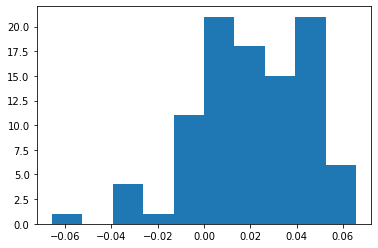

In [476]:
_=plt.hist(results_single[:,1], bins=10)

In [503]:
(results_single[:,1]>0).mean() * 100

66.3265306122449

In [504]:
(results_single[:,1]==0).mean() * 100

16.3265306122449

In [505]:
(results_single[:,1]<0).mean() * 100

17.346938775510203

# build ensemble of classifiers

In [444]:
class NEnsemble:
    def __init__(self, num, clf, **params):
        self.clf = []
        for i in range(num):
            self.clf.append(clf(**params))
            
    def fit(self, feature, label, fraction=0.8):
        for item in self.clf:
            train_dataset, _ = data_split(feature, label)
            item.fit(*train_dataset)
        return self
    
    def predict(self, feature):
        results = self.predict_proba(feature)
        if results.shape[1] == 2:
            return results[:,1] > .5
        else:
            return results > .5
    
    def predict_proba(self, feature):
        results = np.array([clf.predict_proba(feature) for clf in self.clf])
        return np.mean(results, axis=0)
    
    def feature_importance_(self):
        importance = np.array([clf.feature_importance_ for clf in self.clf])
        return importance.mean(axis=0)

In [ ]:
results_ensemble = []

In [487]:
for i in range(500):
    _dataset = data_split(feature_1st_stage, labels)
    _baseline = np.array((_dataset[0][1].mean(), _dataset[1][1].mean()))
    results_ensemble.append(np.array(test_clf(_dataset, NEnsemble, num=10, clf=XGBClassifier, **params)) - _baseline)
    
#     print ('baseline    :  %.4f %.4f' %  tuple(_baseline))
    print ('perform gain:  %.4f %.4f, %.4f %.4f' % (tuple(results_ensemble[-1]) + tuple(_baseline)))

perform gain:  0.1429 0.0263, 0.8571 0.8947
perform gain:  0.1495 -0.0263, 0.8505 0.9211
perform gain:  0.1296 0.0526, 0.8704 0.8421
perform gain:  0.1262 0.0263, 0.8704 0.8421
perform gain:  0.1362 0.0395, 0.8638 0.8684
perform gain:  0.1462 -0.0132, 0.8505 0.9211
perform gain:  0.1296 0.0395, 0.8671 0.8553
perform gain:  0.1429 0.0132, 0.8571 0.8947
perform gain:  0.1429 0.0000, 0.8571 0.8947
perform gain:  0.1462 0.0000, 0.8505 0.9211
perform gain:  0.1296 0.0132, 0.8638 0.8684
perform gain:  0.1296 0.0132, 0.8638 0.8684
perform gain:  0.1429 -0.0263, 0.8571 0.8947
perform gain:  0.1495 0.0132, 0.8505 0.9211
perform gain:  0.1229 0.0132, 0.8738 0.8289
perform gain:  0.1262 -0.0132, 0.8738 0.8289
perform gain:  0.1229 0.0395, 0.8738 0.8289
perform gain:  0.1395 -0.0132, 0.8571 0.8947
perform gain:  0.1362 0.0132, 0.8605 0.8816
perform gain:  0.1362 0.0263, 0.8605 0.8816
perform gain:  0.1262 -0.0132, 0.8738 0.8289
perform gain:  0.1329 0.0395, 0.8638 0.8684
perform gain:  0.1429 0.01

perform gain:  0.1229 0.0526, 0.8738 0.8289
perform gain:  0.1229 0.0132, 0.8704 0.8421
perform gain:  0.1395 0.0263, 0.8605 0.8816
perform gain:  0.1262 0.0263, 0.8704 0.8421
perform gain:  0.1362 0.0395, 0.8605 0.8816
perform gain:  0.1395 0.0395, 0.8571 0.8947
perform gain:  0.1196 0.0789, 0.8771 0.8158
perform gain:  0.1462 0.0000, 0.8538 0.9079
perform gain:  0.1163 0.0395, 0.8804 0.8026
perform gain:  0.1362 0.0000, 0.8605 0.8816
perform gain:  0.1429 0.0263, 0.8538 0.9079
perform gain:  0.1528 -0.0395, 0.8472 0.9342
perform gain:  0.1462 -0.0263, 0.8538 0.9079
perform gain:  0.1296 0.0132, 0.8671 0.8553
perform gain:  0.1462 -0.0263, 0.8538 0.9079
perform gain:  0.1462 0.0000, 0.8538 0.9079
perform gain:  0.1196 0.0395, 0.8771 0.8158
perform gain:  0.1395 -0.0263, 0.8605 0.8816
perform gain:  0.1362 -0.0263, 0.8638 0.8684
perform gain:  0.1329 0.0132, 0.8671 0.8553
perform gain:  0.1329 0.0395, 0.8671 0.8553
perform gain:  0.1395 0.0000, 0.8605 0.8816
perform gain:  0.1362 0.039

KeyboardInterrupt: 

In [491]:
results_ensemble_np = np.array(results_ensemble)

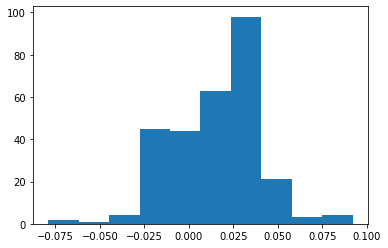

In [494]:
_=plt.hist(results_ensemble_np[:,1], bins=10)

In [500]:
results_ensemble_np[:,1].mean()

0.015420129270544782

In [496]:
(results_ensemble_np[:,1] > 0).mean()

0.6631578947368421

In [499]:
(results_ensemble_np[:,1] == 0).mean()

0.1543859649122807

In [498]:
(results_ensemble_np[:,1] < 0).mean()

0.1824561403508772

thus there's no significant improvement for ensembles... a single XGBoosting model with big n_estimators is just fine.

In [569]:
params

{'n_estimators': 800, 'max_depth': 16, 'min_child_weight': 2, 'n_jobs': 8}

In [570]:
final_classifier = XGBClassifier(**params)

In [571]:
final_classifier.fit(feature_1st_stage, labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=16,
              min_child_weight=2, missing=None, n_estimators=800, n_jobs=8,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [572]:
dataset = data_split(feature_1st_stage, labels)

In [576]:
train_dataset, valid_dataset = dataset
train_features, train_labels = train_dataset
valid_features, valid_labels = valid_dataset

clf = XGBClassifier(**params)
clf.fit(train_features, train_labels)

predicted_train = clf.predict(train_features)
train_acc = (predicted_train == train_labels).mean()

predicted_valid = clf.predict(valid_features)
valid_acc = (predicted_valid == valid_labels).mean()

print (train_labels.mean(), valid_labels.mean())
print (train_acc, valid_acc)

0.8604651162790697 0.881578947368421
1.0 0.8947368421052632


In [577]:
# save model
import pickle
with open('final_classifier_GE.pkl', 'wb') as f:
    pickle.dump([clf, selected_feature_names[feature_importance > 0.01], feature_map_tables], f)

In [583]:
clf = XGBClassifier(**params)
clf.fit(features_8[:,np.argsort(rank_summary)[:160]][:,feature_importance > 0.01], labels_8)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=16,
              min_child_weight=2, missing=None, n_estimators=800, n_jobs=8,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [584]:
test_feature = features_2[:,np.argsort(rank_summary)[:160]][:,feature_importance > 0.01]

In [585]:
predicted_test = clf.predict(test_feature)
test_acc = (predicted_test == labels_2).mean()

In [586]:
test_acc

0.868421052631579

In [587]:
labels_2.mean()

0.868421052631579

# model usage:
    load the model file with pickle, get a tuple of (classifier, feature_names, feature_map_table)
    find feature mentioned in feature_names, if it is in the feature_map_tables, map it with its index, use classifier to get the result.

In [532]:
with open('final_classifier_GE.pkl', 'rb') as f:
    classifier, feature_names, map_table = pickle.load(f)

In [549]:
from sklearn.metrics import confusion_matrix, roc_auc_score

confusion_matrixs = []
roc_aucs = []

In [603]:
(1+0.96875)/2

0.984375

In [605]:
for i in range(100):
    print('\r%2d/%2d  ' % (i+1,100), end='')
    train_dataset, valid_dataset = data_split(feature_1st_stage, labels)
    train_features, train_labels = train_dataset
    valid_features, valid_labels = valid_dataset
    
    clf = XGBClassifier(**params)
    clf.fit(train_features, train_labels)
    
    predicted_proba_valid = clf.predict_proba(valid_features)
    predicted_valid = predicted_proba_valid[:,1] >= 0.984375
    
    confusion_matrixs.append(confusion_matrix(y_true=valid_labels, y_pred=predicted_valid))
    roc_aucs.append(roc_auc_score(y_true=valid_labels, y_score=predicted_proba_valid[:,1]))

100/100  

In [606]:
averaged_confusion_matrix = np.array(confusion_matrixs).mean(axis=0)

tn, fp, fn, tp = averaged_confusion_matrix.ravel()

# specificity
print ('specificity: %.4f' % (tn/(tn+fp)))

# sensitivity
print ('sensitivity: %.4f' % (tp/(tp+fn)))

specificity: 0.5655
sensitivity: 0.8366


In [607]:
np.array(roc_aucs).mean()

0.8059526230620778